# ¿El planeta se calienta?  80 años de cambio en la temperatura global


### Análisis exploratorio y tratamiento de datos

Importación de librerías necesarias

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Lectura de los datasets

In [2]:
df_temperature = pd.read_csv(r'average-monthly-surface-temperature.csv')
df_continent = pd.read_csv(r'continents2.csv')

In [3]:
df_temperature.head()

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695


In [4]:
df_continent.head()

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


Eliminamos columnas que no utilizaremos: name, alpha-2, iso_3166-2, region-code, sub-region-code, intermediate-region-code

In [5]:
df_continent.drop(['name','alpha-2','iso_3166-2','iso_3166-2', 'sub-region-code', 'intermediate-region-code', 'intermediate-region', 'country-code', 'region-code'],
  axis='columns', inplace=True)
df_continent.head()

,alpha-3,region,sub-region
0,AFG,Asia,Southern Asia
1,ALA,Europe,Northern Europe
2,ALB,Europe,Southern Europe
3,DZA,Africa,Northern Africa
4,ASM,Oceania,Polynesia


In [6]:
df_merge = df_temperature.merge(df_continent, 
                      how='left', 
                      left_on='Code', 
                      right_on='alpha-3', 
                      suffixes=('_temp', '_cont'))
df_merge

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,alpha-3,region,sub-region
0,Afghanistan,AFG,1940,1940-01-15,-2.032494,11.327695,AFG,Asia,Southern Asia
1,Afghanistan,AFG,1940,1940-02-15,-0.733503,11.327695,AFG,Asia,Southern Asia
2,Afghanistan,AFG,1940,1940-03-15,1.999134,11.327695,AFG,Asia,Southern Asia
3,Afghanistan,AFG,1940,1940-04-15,10.199754,11.327695,AFG,Asia,Southern Asia
4,Afghanistan,AFG,1940,1940-05-15,17.942135,11.327695,AFG,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...
198895,Zimbabwe,ZWE,2024,2024-08-15,20.559408,22.921250,ZWE,Africa,Sub-Saharan Africa
198896,Zimbabwe,ZWE,2024,2024-09-15,23.642931,22.921250,ZWE,Africa,Sub-Saharan Africa
198897,Zimbabwe,ZWE,2024,2024-10-15,24.407030,22.921250,ZWE,Africa,Sub-Saharan Africa
198898,Zimbabwe,ZWE,2024,2024-11-15,25.672321,22.921250,ZWE,Africa,Sub-Saharan Africa


Comprobar la existencia de valores nulos y tratarlos

In [7]:
print(df_merge.isna().sum())
df_merge_nulls = df_merge[df_merge.isna().any(axis=1)]
paises_con_nulos = df_merge_nulls['Entity'].dropna().unique()
print("Los países con datos nulos son:", ", ".join(paises_con_nulos))
df_merge_nulls

Entity                              0
Code                                0
year                                0
Day                                 0
Average surface temperature         0
Average surface temperature.1       0
alpha-3                          2040
region                           2040
sub-region                       2040
dtype: int64
Los países con datos nulos son: Kosovo, World


,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,alpha-3,region,sub-region
99960,Kosovo,OWID_KOS,1940,1940-01-15,-7.012903,7.452425,NaN,NaN,NaN
99961,Kosovo,OWID_KOS,1940,1940-02-15,-1.466986,7.452425,NaN,NaN,NaN
99962,Kosovo,OWID_KOS,1940,1940-03-15,0.732306,7.452425,NaN,NaN,NaN
99963,Kosovo,OWID_KOS,1940,1940-04-15,8.351257,7.452425,NaN,NaN,NaN
99964,Kosovo,OWID_KOS,1940,1940-05-15,12.231471,7.452425,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
195835,World,OWID_WRL,2024,2024-08-15,16.822422,15.090968,NaN,NaN,NaN
195836,World,OWID_WRL,2024,2024-09-15,16.174273,15.090968,NaN,NaN,NaN
195837,World,OWID_WRL,2024,2024-10-15,15.245267,15.090968,NaN,NaN,NaN
195838,World,OWID_WRL,2024,2024-11-15,14.098477,15.090968,NaN,NaN,NaN


Los datos nulos corresponden a Kosovo y a World, en el caso de World se eliminará del estudio y se analizarán los datos a nivel mundial posteriormente.
En el caso de Kosovo se modificaran los valores nulos segun información real del país y se actualizará el código para que se ajuste según el estándar ISO 3166-1 alpha-3 (código de tres letras) es "XKX".

In [8]:
row_world = df_merge.loc[df_merge['Entity'] == 'World'].index
df_merge.drop(row_world, axis=0, inplace=True)
row_kosovo = df_merge.loc[df_merge['Entity'] == 'Kosovo'].index
df_merge.loc[row_kosovo, 'Code'] = 'XKX'
df_merge.loc[row_kosovo, 'region'] = 'Europe'
df_merge.loc[row_kosovo, 'sub-region'] = 'Southern Europe'
df_merge[df_merge['Entity'] == 'Kosovo']

,Entity,Code,year,Day,Average surface temperature,Average surface temperature.1,alpha-3,region,sub-region
99960,Kosovo,XKX,1940,1940-01-15,-7.012903,7.452425,NaN,Europe,Southern Europe
99961,Kosovo,XKX,1940,1940-02-15,-1.466986,7.452425,NaN,Europe,Southern Europe
99962,Kosovo,XKX,1940,1940-03-15,0.732306,7.452425,NaN,Europe,Southern Europe
99963,Kosovo,XKX,1940,1940-04-15,8.351257,7.452425,NaN,Europe,Southern Europe
99964,Kosovo,XKX,1940,1940-05-15,12.231471,7.452425,NaN,Europe,Southern Europe
...,...,...,...,...,...,...,...,...,...
100975,Kosovo,XKX,2024,2024-08-15,23.763653,12.345814,NaN,Europe,Southern Europe
100976,Kosovo,XKX,2024,2024-09-15,17.061443,12.345814,NaN,Europe,Southern Europe
100977,Kosovo,XKX,2024,2024-10-15,12.335925,12.345814,NaN,Europe,Southern Europe
100978,Kosovo,XKX,2024,2024-11-15,3.705254,12.345814,NaN,Europe,Southern Europe


Se actualizan los nombres de las series a fin de que sean mas entendibles, se eliminará alpha-3 y Day, ya que todos los datos fueron tomados el día 15 y se agregarán 2 nuevas filas: mes y década. De esta forma tendremos datos mas organizados para analisis futuros.

In [9]:
df_merge['Day'] = pd.to_datetime(df_merge['Day'])
df_merge.insert(3, 'Month', df_merge['Day'].dt.month_name())

df_merge.drop(['alpha-3', 'Day'], axis='columns', inplace=True)
df_temp_country = df_merge.rename(columns={
    'Average surface temperature': 'AVG_daily_surface_temperature',
    'Average surface temperature.1': 'AVG_monthly_surface_temperature',
    'sub-region': 'sub_region',
    'year': 'Year',
    'region': 'Region'
})
df_temp_country.insert(4, 'Decade', (df_temp_country['Year'] // 10) * 10)
df_temp_country

,Entity,Code,Year,Month,Decade,AVG_daily_surface_temperature,AVG_monthly_surface_temperature,Region,sub_region
0,Afghanistan,AFG,1940,January,1940,-2.032494,11.327695,Asia,Southern Asia
1,Afghanistan,AFG,1940,February,1940,-0.733503,11.327695,Asia,Southern Asia
2,Afghanistan,AFG,1940,March,1940,1.999134,11.327695,Asia,Southern Asia
3,Afghanistan,AFG,1940,April,1940,10.199754,11.327695,Asia,Southern Asia
4,Afghanistan,AFG,1940,May,1940,17.942135,11.327695,Asia,Southern Asia
...,...,...,...,...,...,...,...,...,...
198895,Zimbabwe,ZWE,2024,August,2020,20.559408,22.921250,Africa,Sub-Saharan Africa
198896,Zimbabwe,ZWE,2024,September,2020,23.642931,22.921250,Africa,Sub-Saharan Africa
198897,Zimbabwe,ZWE,2024,October,2020,24.407030,22.921250,Africa,Sub-Saharan Africa
198898,Zimbabwe,ZWE,2024,November,2020,25.672321,22.921250,Africa,Sub-Saharan Africa


### Desarrollo de Infografías y Gráfico Interactivo

🌡️ Mapa de Calor

Un mapa de calor que muestre cómo ha cambiado la temperatura promedio mensual en cada país a lo largo de las décadas (1940-2024). Se utiliza una escala de colores donde el azul representa temperaturas frías y el rojo las más cálidas.

In [21]:
heatmap_data = df_temp_country.pivot_table(index='Entity', columns='Decade', values='AVG_monthly_surface_temperature', aggfunc='mean')
heatmap_data

Decade,1940,1950,1960,1970,1980,1990,2000,2010,2020
Entity,,,,,,,,,
Afghanistan,11.966856,11.262519,11.318891,11.769125,11.884798,11.781728,12.778718,13.015984,13.484999
Albania,11.613595,12.195200,12.065482,11.942038,12.091216,12.241671,12.447178,13.143283,13.645772
Algeria,21.794377,22.052113,22.442900,22.332246,22.957952,23.125030,23.736147,24.137494,24.970193
American Samoa,26.320573,26.306141,26.412938,26.302019,26.388935,26.626886,26.746028,26.888104,26.929053
Andorra,4.223714,4.246163,4.195718,4.020200,4.778128,5.078823,5.480793,5.749042,6.456267
...,...,...,...,...,...,...,...,...,...
Venezuela,24.194641,24.525087,25.022908,24.647285,24.935836,25.072293,25.416280,25.803003,25.867386
Vietnam,22.648418,23.173198,23.130450,23.198221,23.436855,23.646822,23.787034,24.180327,24.371023
Yemen,23.892661,23.873648,24.263910,24.254295,24.948319,25.475290,25.781733,25.984243,26.261930


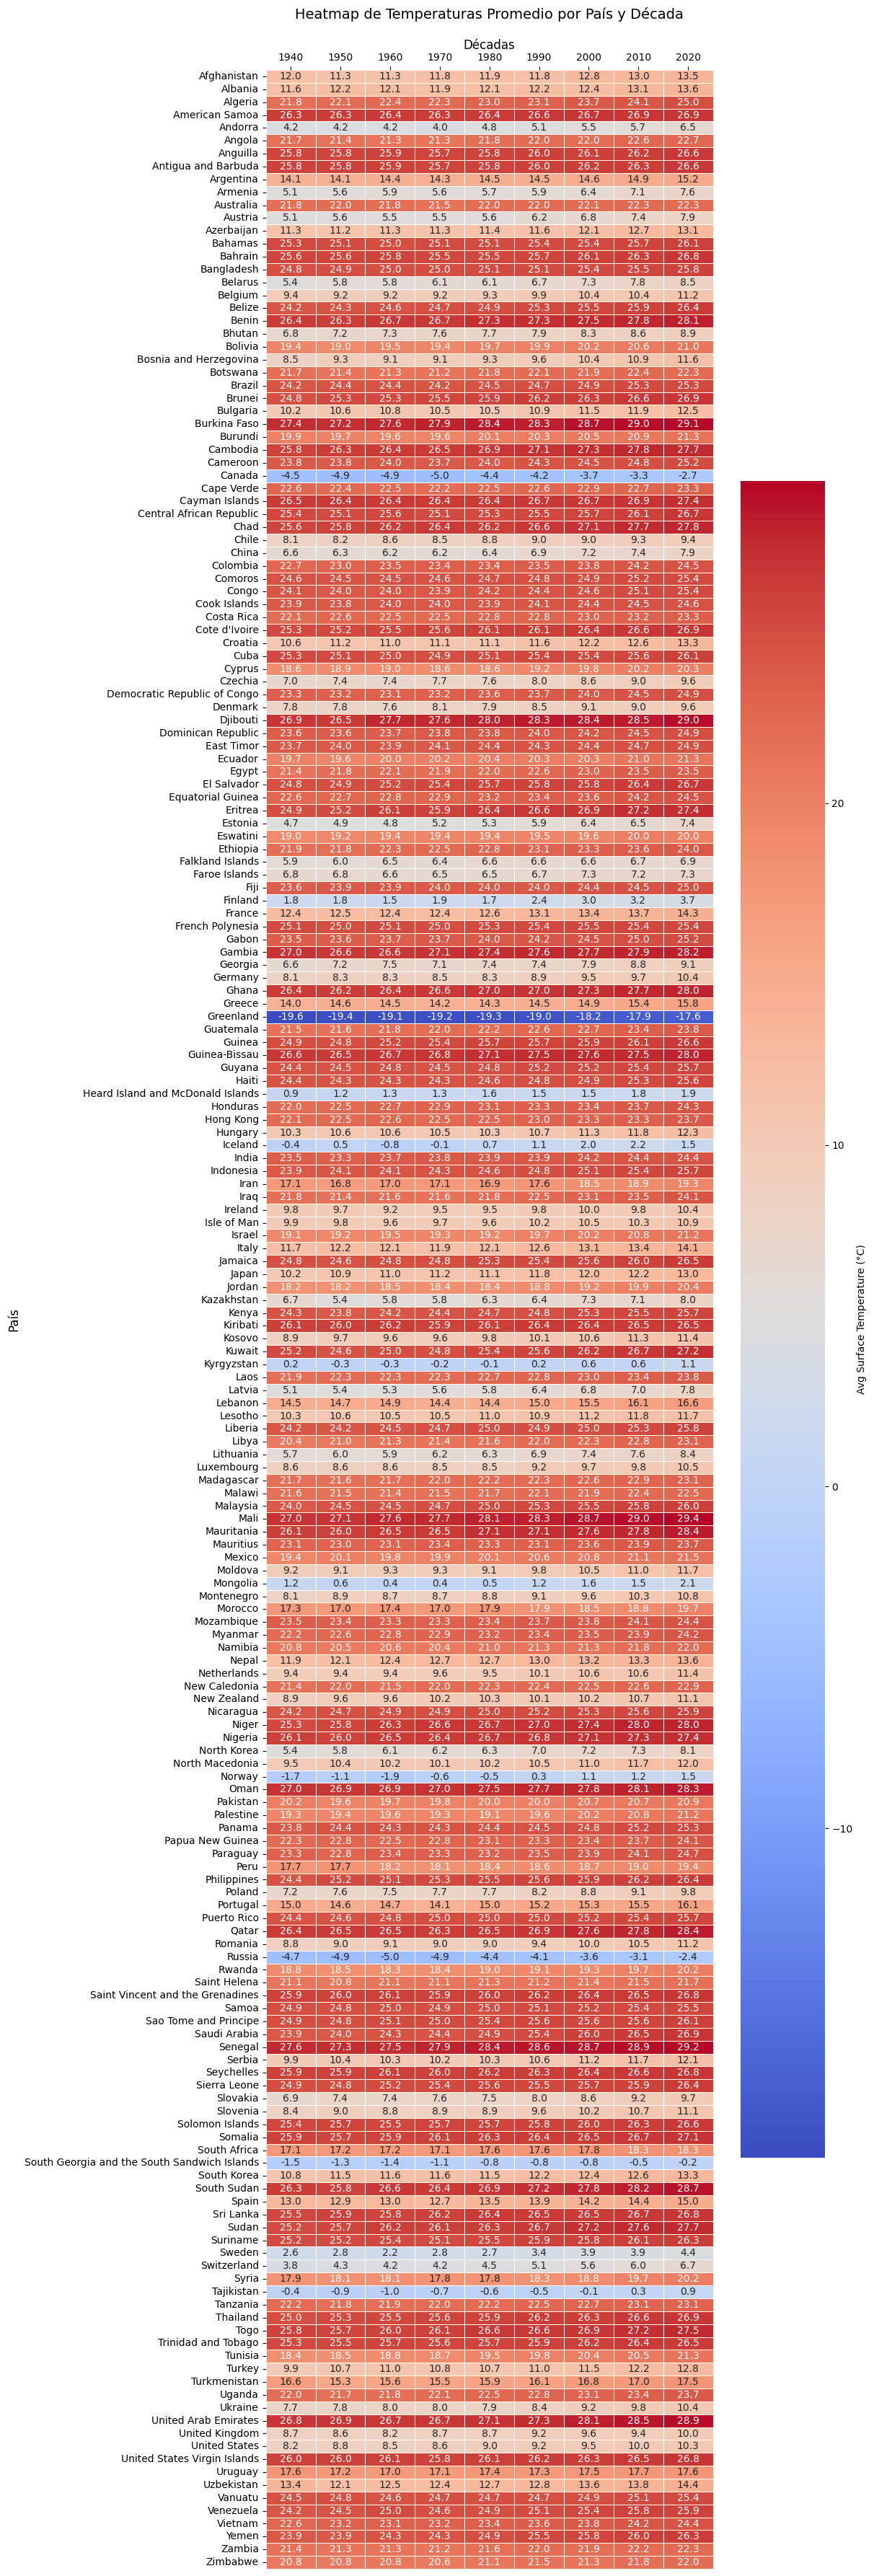

In [32]:
plt.figure(figsize=(10, 45))
ax = sns.heatmap(
    heatmap_data,
    cmap="coolwarm",  
    annot=True,
    fmt=".1f",
    linewidths=0.5,
    cbar_kws={'label': 'Avg Surface Temperature (°C)'}
)
ax.xaxis.tick_top()  
ax.xaxis.set_label_position('top')  
plt.title("Heatmap de Temperaturas Promedio por País y Década", fontsize=14, pad=20)
plt.xlabel("Décadas", fontsize=12)
plt.ylabel("País", fontsize=12)
plt.show()

🌍 Mapa Interactivo de Temperaturas por País

Un mapa del mundo donde cada país cambie de color según su temperatura promedio mensual. Posibilidad de seleccionar el año y el mes para ver la evolución en el tiempo. Tooltip al pasar el mouse sobre un país para mostrar su temperatura exacta.

📅 Evolución Mensual de la Temperatura por País

Un gráfico de líneas donde el usuario pueda seleccionar un país y ver cómo han cambiado sus temperaturas mes a mes desde 1940 hasta 2024.
Permitir comparar dos países simultáneamente. Slider para moverse por décadas y ver las tendencias.

 🏜️ El Mundo Más Cálido: Comparación 1940 vs. 2024

Una malla de 2 gráficos de línea con la temperatura media mensual del planeta. Mostrar cómo los inviernos se han vuelto menos fríos y los veranos más calurosos. 